In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
#### 1. EDA - Null Analysis / Outlier Analysis / Dropping of Column
#### 2. Univariate . Multivariate Analysis
#### 3. Feature Engineerring - Dimensionality Reduction, One Hot Encoding , Scaling
#### 4. testing Assumptions of Linear regression
#### 5. Building a model on train data set
#### 6. Validating the model on test data set
#### 7. Check for accuracy of the model, retrain / adjust if not up to the mark


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#### 1. EDA - Null Analysis / Outlier Analysis / Dropping of Column

In [8]:
## There are no null values.
## Let us drop dteday column as it does not add any value. The season, mnth etc. are good enough for EDA
df_no_dt = df.drop(["dteday"], axis=1)
df_no_dt.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


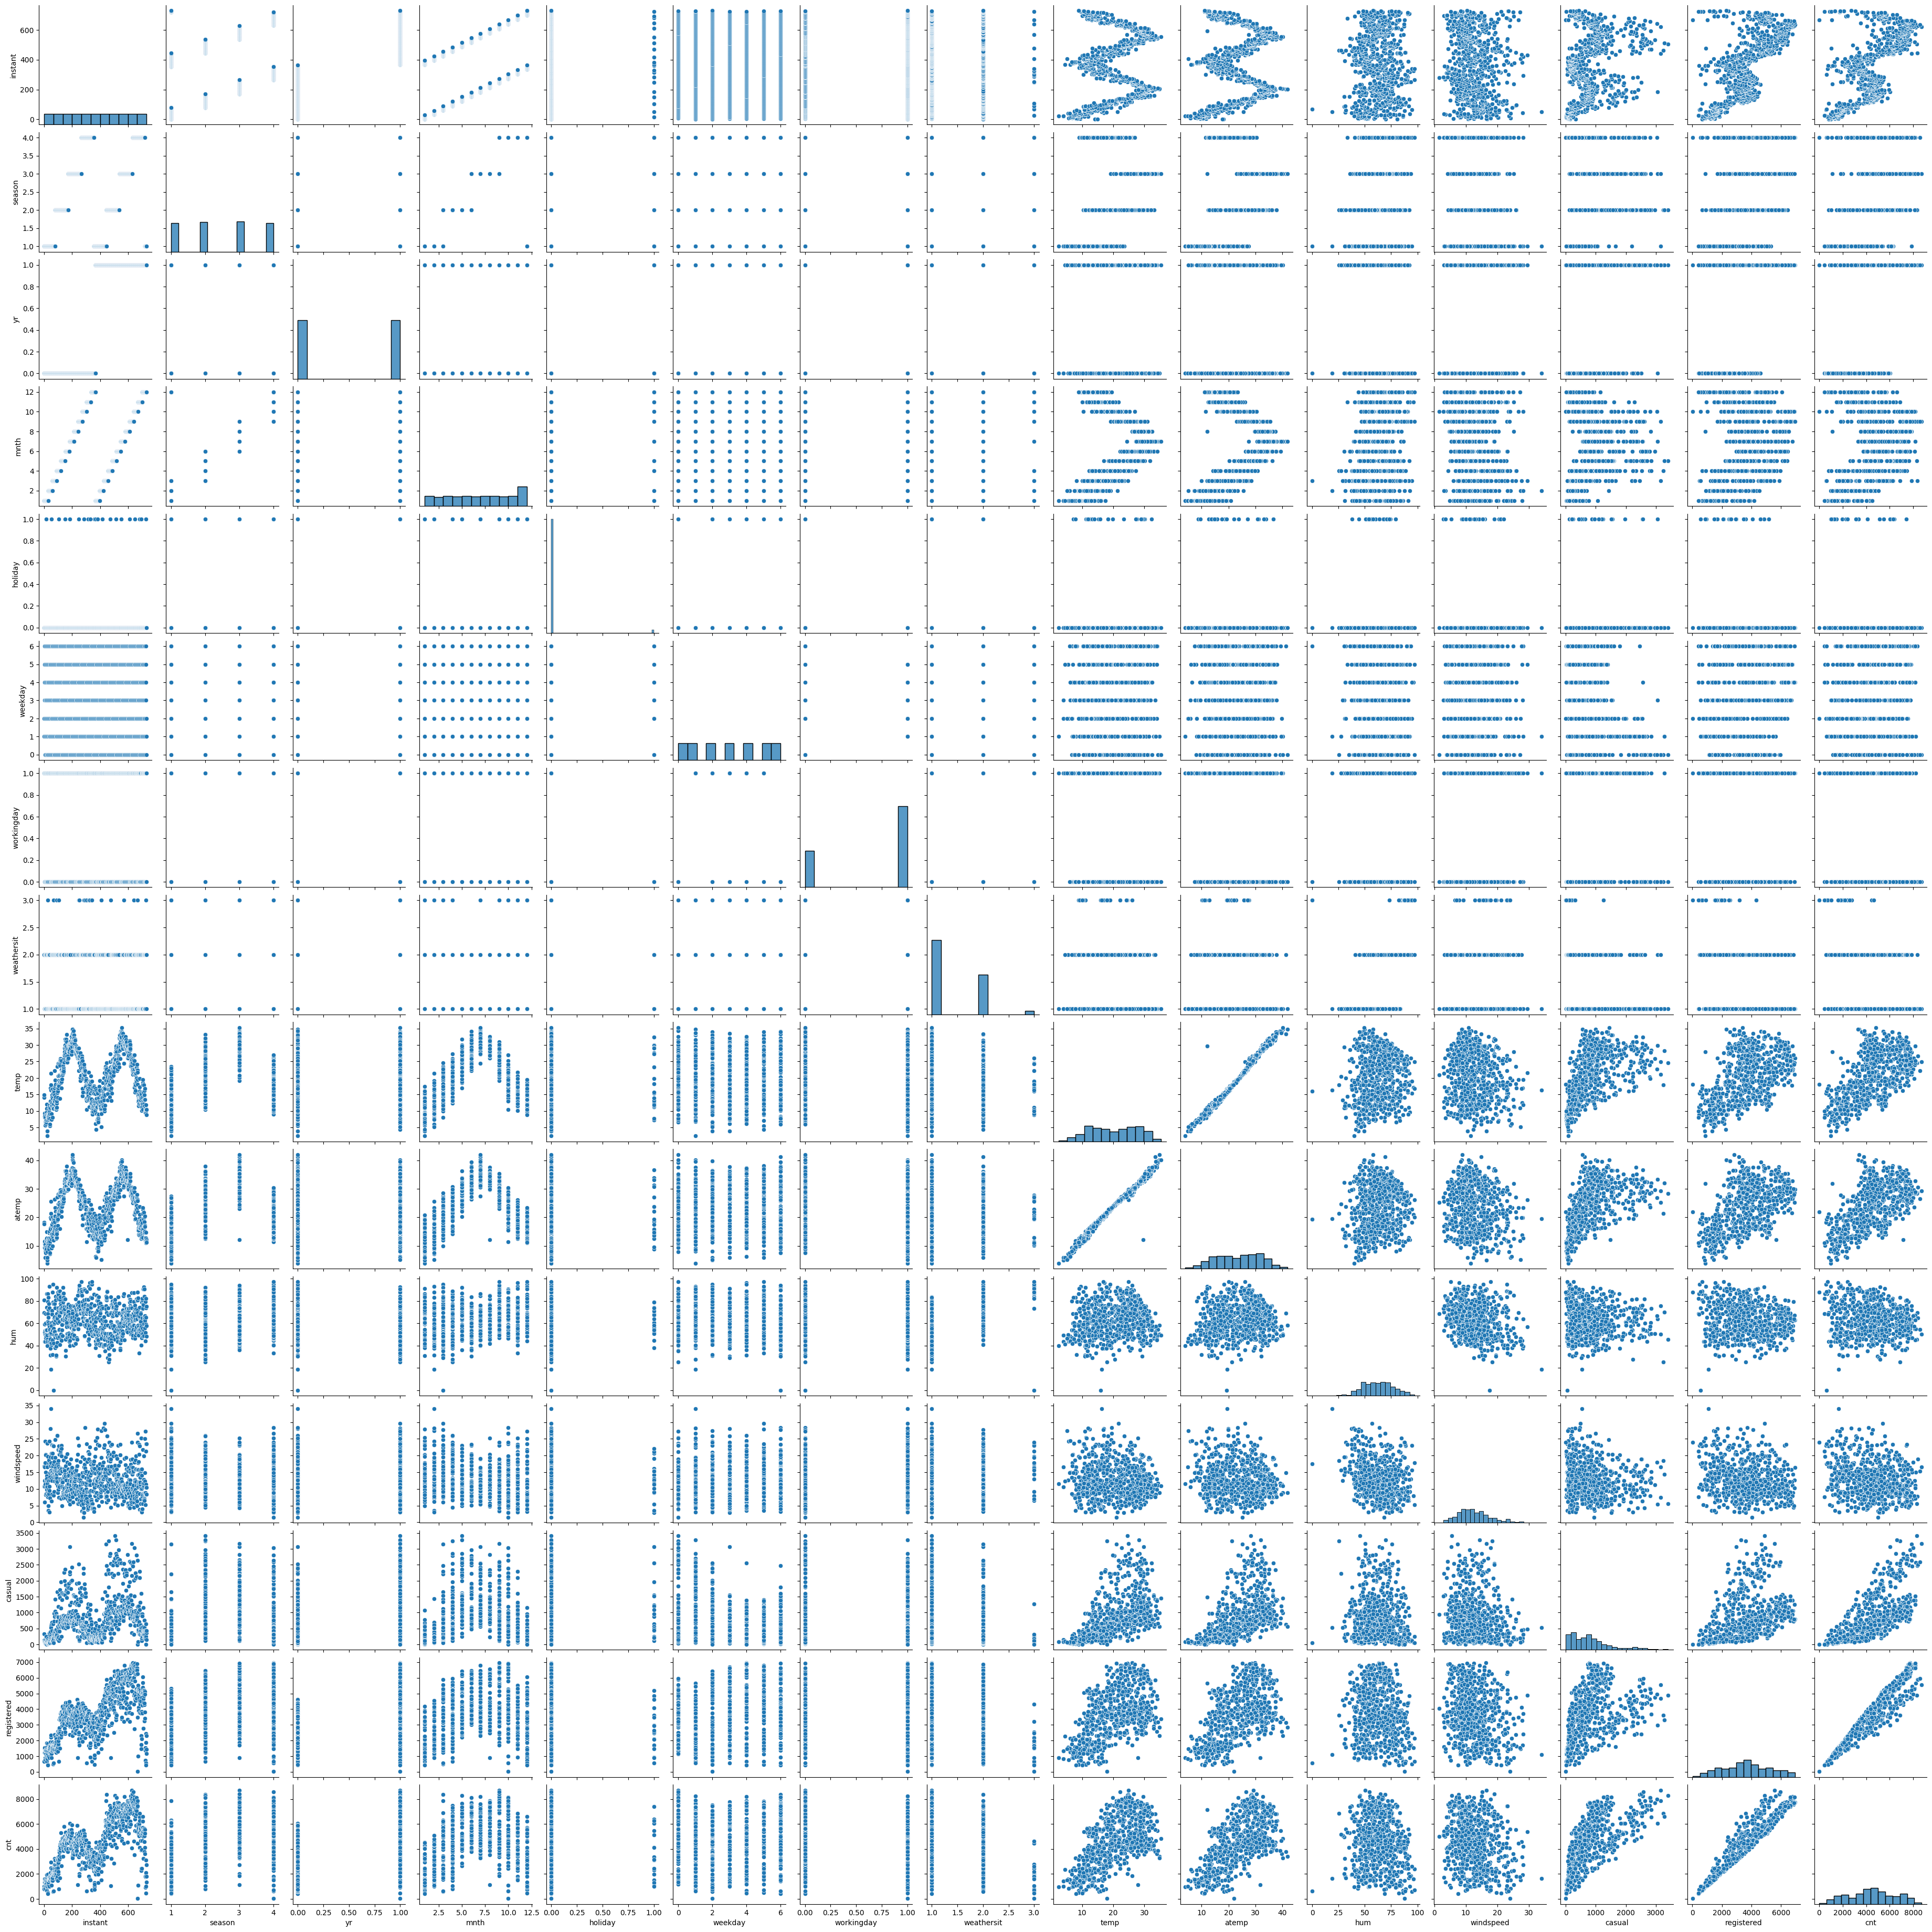

In [9]:
#### 2. Univariate . Multivariate Analysis
## Let us see the relationships of pair of variables
sns.pairplot(df_no_dt)

In [10]:
## Insight 1- From pairplots, there seems to be linear relation between temparature (temp and atemp) and count of bikes

In [14]:
## Probably, we should also drop the instant column
df_no_dt_inst = df_no_dt.drop(["instant"], axis=1)
df_no_dt_inst.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
## The columns casual, registered have high collinearity with target column cnt. I think we should remove them for the model building. 
df_no_dt_inst_cas_reg = df_no_dt_inst.drop(["casual","registered"], axis=1)
df_no_dt_inst_cas_reg.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
## Let us think about season column
## season : season (1:spring, 2:summer, 3:fall, 4:winter)
df_no_dt_inst_cas_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<Axes: xlabel='weathersit', ylabel='cnt'>

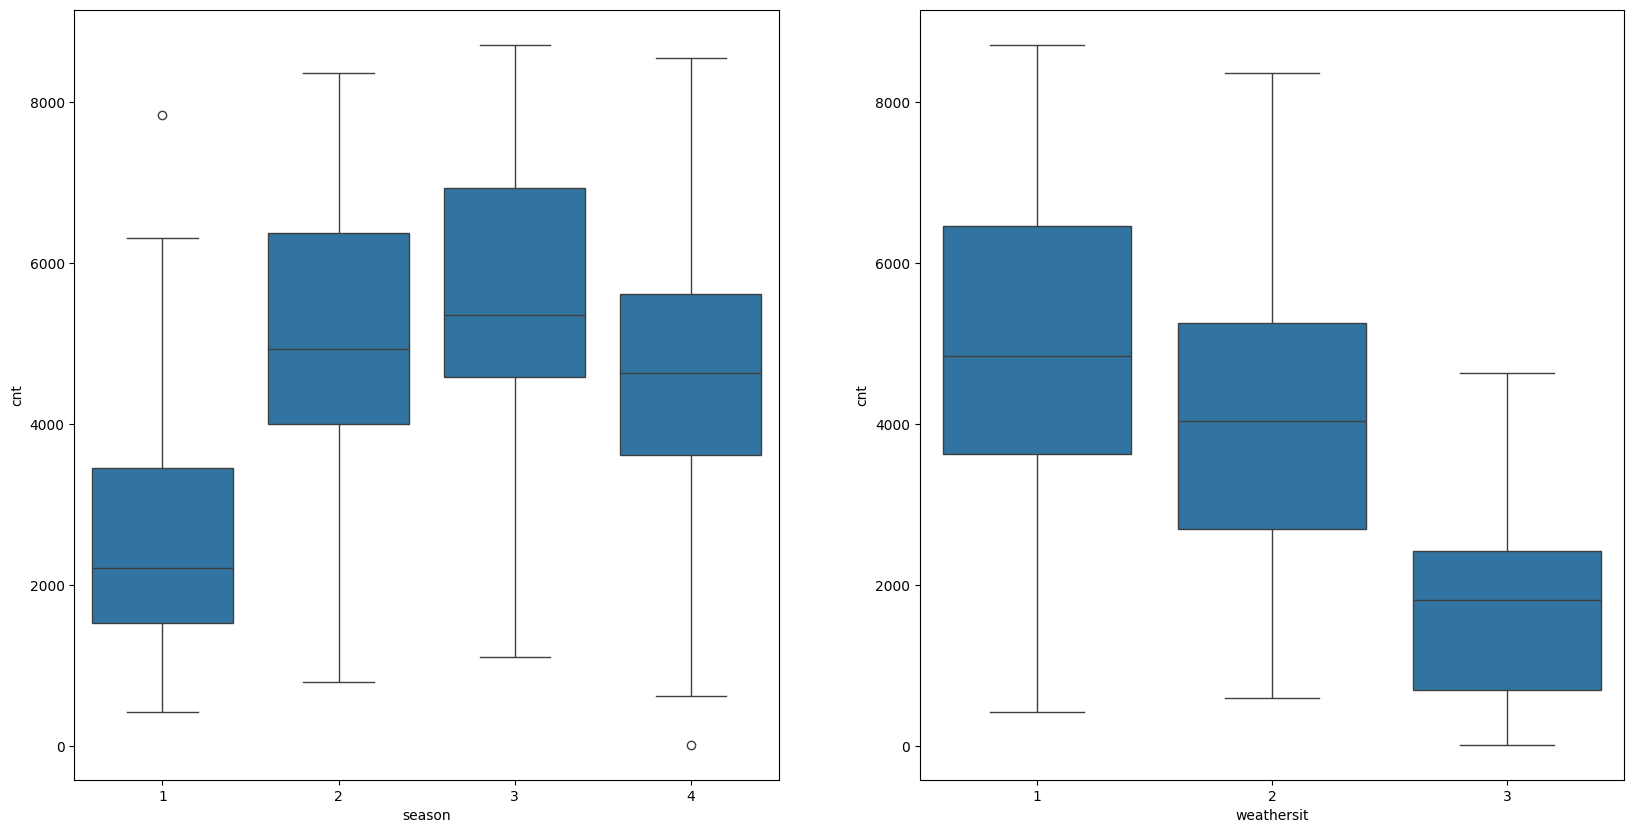

In [20]:
## Let us see how cnt varies with respect to season, weathersit
## weathersit : 
## 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
## 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
## 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
## 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_no_dt_inst_cas_reg )
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_no_dt_inst_cas_reg )

In [21]:
## Insight 2 : The demand for bikes is quite less for Spring compared to other seasons
## Insight 3 : There is no demand for bikes in heavy rains. Bikes are preferred - of course - in clear or cloudy whether.

In [22]:
## we also see high collinearilty between temp and atemp (feels like temp). Let us keep just atemp and drop temp.
df_no_dt_inst_cas_reg_temp = df_no_dt_inst_cas_reg.drop(["temp"], axis=1)
df_no_dt_inst_cas_reg_temp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


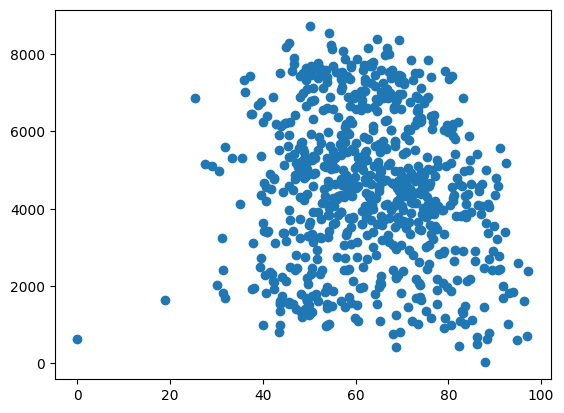

In [23]:
## Let us see how humidity plays a role in bike demand
plt.scatter(df_no_dt_inst_cas_reg_temp.hum, df_no_dt_inst_cas_reg_temp.cnt)

In [26]:
## Insight 4 : For humidity between 40 to 80, there is high demand for bikes. So, hum is also an important independent variable.

<Axes: xlabel='mnth', ylabel='cnt'>

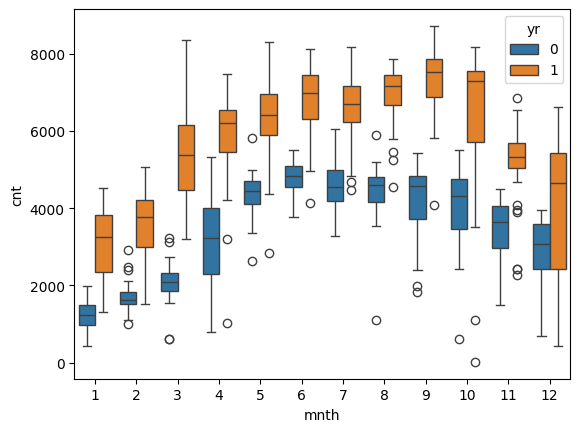

In [27]:
## Let us see how demand varies over different months for year 2018 and 2019
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = df_no_dt_inst_cas_reg_temp )

In [28]:
## Insight 5 : The demand increases after march. Also, there is significant increase in demand in 2019 which suggests a trend change.
## Possibly people will use bikes more as they are conscious about health.
## We must keep the year variable as it shows a rising demand trend.

In [ ]:
## At this point, we have found the independent variables that can impact the demand. 

In [ ]:
#### 3. Feature Engineerring - Dimensionality Reduction, One Hot Encoding , Scaling
## We do not need encoding as all variables left are numeric.

In [40]:
#### Train - Test Split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_no_dt_inst_cas_reg_temp, train_size = 0.70, test_size = 0.30, random_state = 100)

In [41]:
df_test.shape

(219, 11)

In [42]:
df_train.shape

(510, 11)

In [43]:
## Let us do the scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = ['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])


In [45]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.507843,0.504456,0.025490,0.491830,0.711765,0.20098,0.512989,0.650369,0.320768,0.513620
std,0.370649,0.500429,0.315338,0.157763,0.329528,0.453386,0.27377,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.00000,0.332086,0.538643,0.199179,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.00000,0.526811,0.653714,0.296763,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.50000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<Axes: >

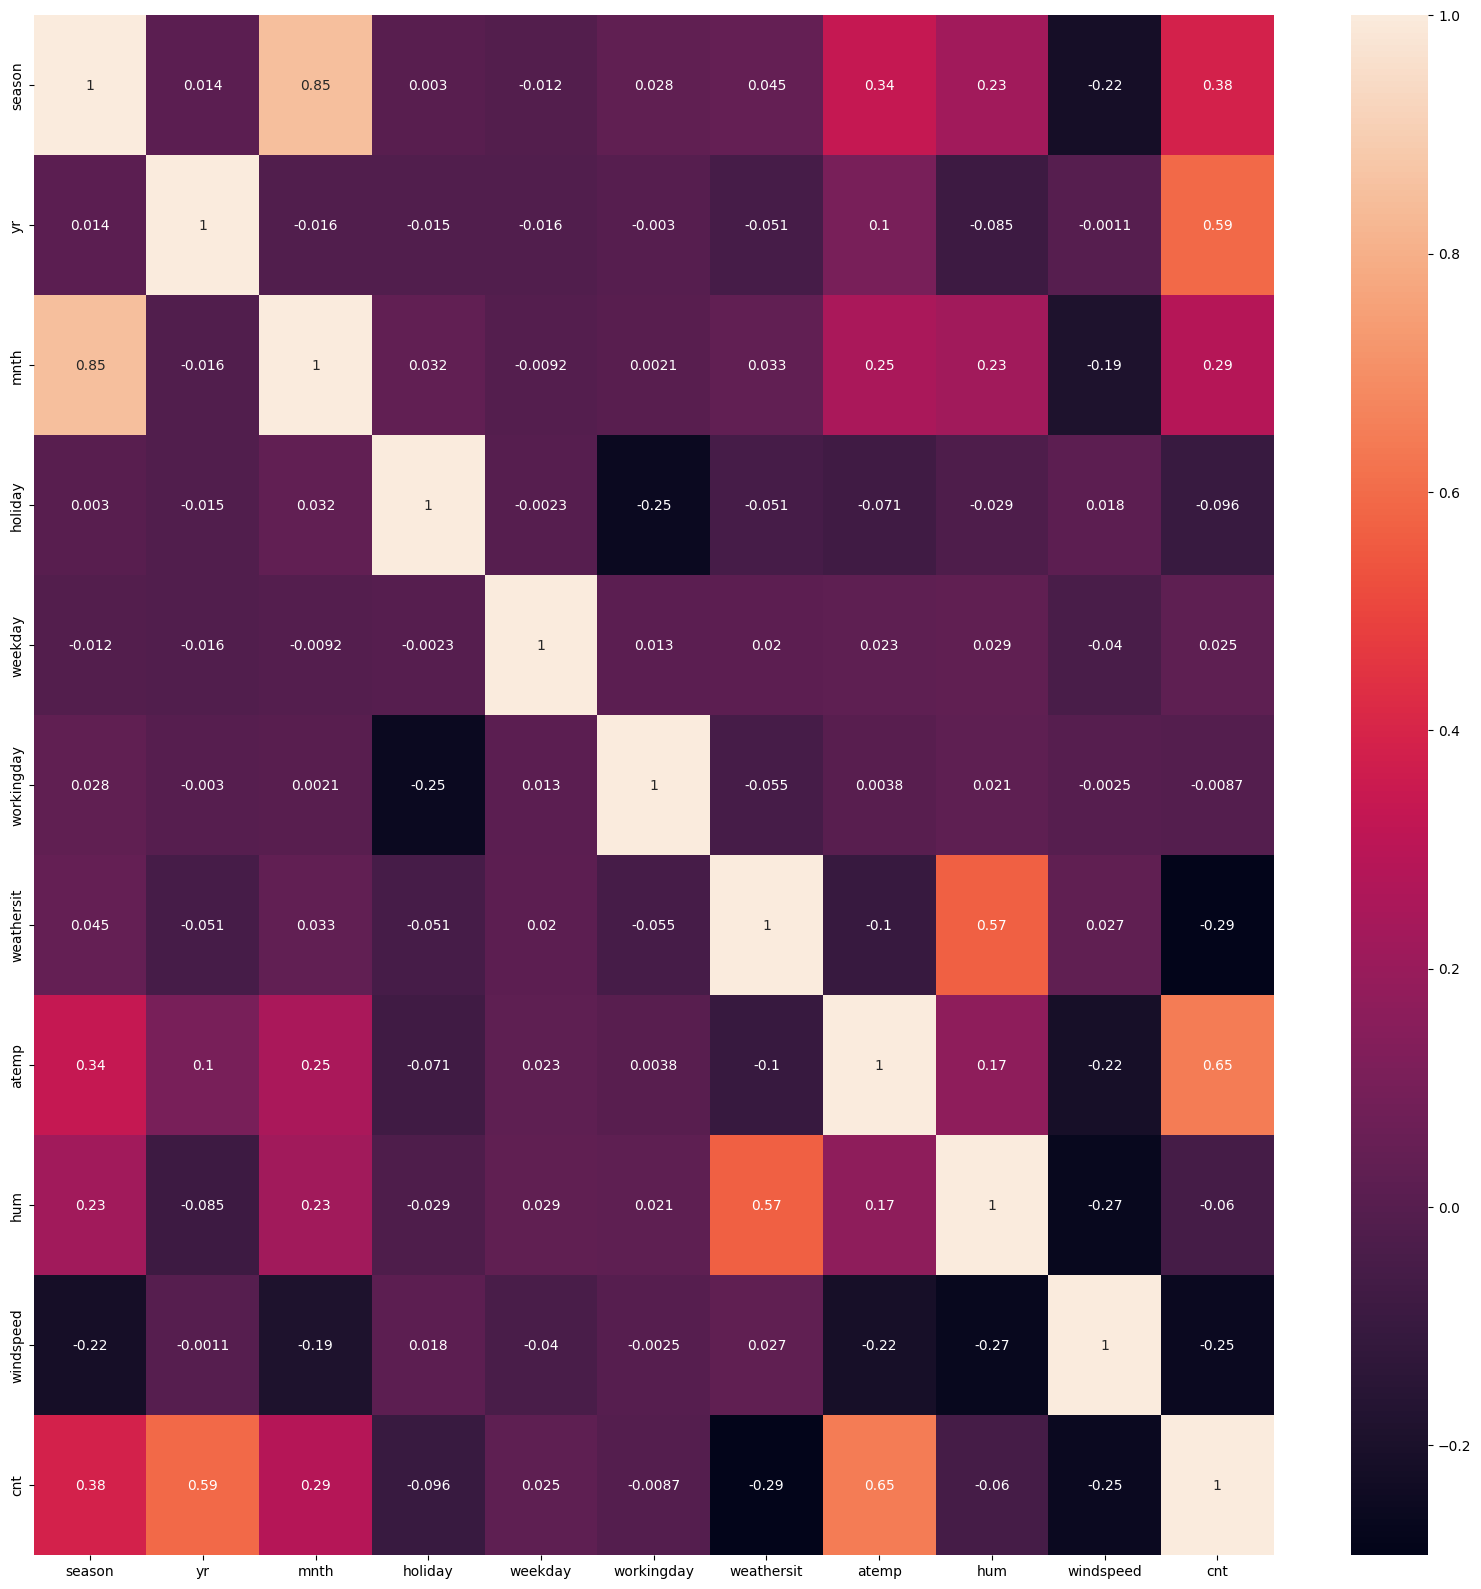

In [46]:
## Let us see correlation
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True)

In [47]:
## Insight 6 : The demand is significantly correlated with temprature and year.
## Insight 7 : The humidity is correlated to weathersit and month and seasons are correlated too. Should we remove some of these dimensions?

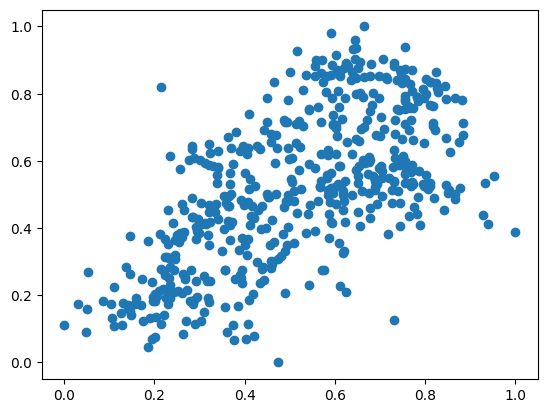

In [48]:
plt.scatter(df_train.atemp, df_train.cnt)

In [51]:
## let us get x_train and y_train
y_train = df_train.pop('cnt')
x_train = df_train

In [52]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [53]:
x_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
653,1.000000,1.0,0.818182,0.0,0.500000,1.0,0.0,0.501133,0.575354,0.300794
576,0.666667,1.0,0.545455,0.0,0.500000,1.0,0.0,0.766351,0.725633,0.264686
426,0.000000,1.0,0.181818,0.0,0.000000,0.0,0.5,0.438975,0.640189,0.255342
728,0.000000,1.0,1.000000,0.0,0.166667,1.0,0.0,0.200348,0.498067,0.663106
482,0.333333,1.0,0.272727,0.0,0.000000,0.0,0.5,0.391735,0.504508,0.188475


In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    float64
 1   yr          510 non-null    float64
 2   mnth        510 non-null    float64
 3   holiday     510 non-null    float64
 4   weekday     510 non-null    float64
 5   workingday  510 non-null    float64
 6   weathersit  510 non-null    float64
 7   atemp       510 non-null    float64
 8   hum         510 non-null    float64
 9   windspeed   510 non-null    float64
dtypes: float64(10)
memory usage: 43.8 KB


In [57]:
## Let us build the OLS model
import pandas as pd
import statsmodels.api as sm

# 1. Reset index to avoid alignment issues
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# 2. Convert all X columns to numeric (coerce bad values to NaN)
x_train = x_train.apply(pd.to_numeric, errors='coerce')

# 3. Convert y to numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# 4. Drop any NaNs introduced during conversion
df_clean = pd.concat([x_train, y_train], axis=1).dropna()
x_clean = df_clean[x_train.columns]
y_clean = df_clean[y_train.name]

# 5. Add intercept
x_clean = sm.add_constant(x_clean)

# 6. Fit model
lr = sm.OLS(y_clean, x_clean).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 07 Dec 2025   Prob (F-statistic):          2.15e-167
Time:                        20:14:53   Log-Likelihood:                 449.19
No. Observations:                 510   AIC:                            -876.4
Df Residuals:                     499   BIC:                            -829.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2290      0.031      7.273      0.0

In [58]:
x_clean.shape

(510, 11)

In [59]:
lr.params

const         0.229005
season        0.143002
yr            0.233935
mnth         -0.015951
holiday      -0.106850
weekday       0.017946
workingday   -0.021864
weathersit   -0.156304
atemp         0.507936
hum          -0.107425
windspeed    -0.150603
dtype: float64

In [60]:
## Let us check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,17.31
2,mnth,13.24
0,season,11.28
7,atemp,8.17
9,windspeed,3.62
5,workingday,3.62
4,weekday,3.10
6,weathersit,2.27
1,yr,2.01
3,holiday,1.11


In [62]:
## I think VIF confirms our suspicion that humidity and mnth shows collinearity with other independent
## Let us remove the hum and mnth and retrain the model
x_clean.drop(['hum', 'mnth'], axis = 1, inplace = True )

In [63]:
x_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   season      510 non-null    float64
 2   yr          510 non-null    float64
 3   holiday     510 non-null    float64
 4   weekday     510 non-null    float64
 5   workingday  510 non-null    float64
 6   weathersit  510 non-null    float64
 7   atemp       510 non-null    float64
 8   windspeed   510 non-null    float64
dtypes: float64(9)
memory usage: 36.0 KB


In [64]:
# 5. Add intercept
x_clean = sm.add_constant(x_clean)

# 6. Fit new model
lr1 = sm.OLS(y_clean, x_clean).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sun, 07 Dec 2025   Prob (F-statistic):          3.28e-168
Time:                        22:21:40   Log-Likelihood:                 445.46
No. Observations:                 510   AIC:                            -872.9
Df Residuals:                     501   BIC:                            -834.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1646      0.021      7.992      0.0

In [65]:
lr1.params

const         0.164565
season        0.127110
yr            0.236433
holiday      -0.110358
weekday       0.017731
workingday   -0.023609
weathersit   -0.189720
atemp         0.497408
windspeed    -0.129243
dtype: float64

In [67]:
## Let is check the VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif1 = pd.DataFrame()
vif1['Features'] = x_clean.columns
vif1['VIF'] = [variance_inflation_factor(x_clean.values, i) for i in range(x_clean.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
0,const,20.81
7,atemp,1.19
1,season,1.17
5,workingday,1.08
3,holiday,1.08
8,windspeed,1.08
6,weathersit,1.03
2,yr,1.01
4,weekday,1.00


In [ ]:
## const is okay in this list?

<Axes: ylabel='Density'>

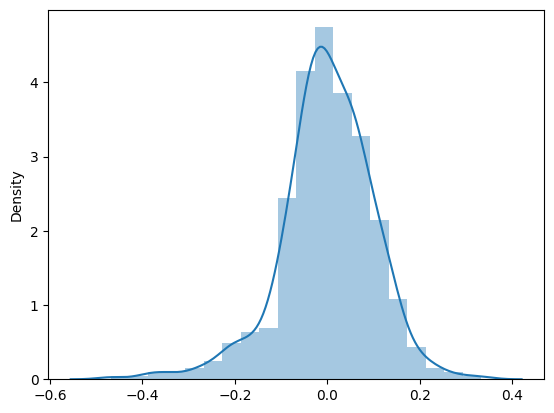

In [68]:
## Let us see the error analysis now
y_train_pred = lr1.predict(x_clean)
sns.distplot((y_clean - y_train_pred), bins = 20)

In [ ]:
## Above  plot confirms that we have normality of errors with mean value of 0.

In [69]:
## Let us see the R2 score for trained data
from sklearn.metrics import r2_score
r2_score(y_clean, y_train_pred)

0.7972731996934717

In [ ]:
#### 6. Validating the model on test data set

In [70]:
df_test[num_var] = scaler.transform(df_test[num_var])

In [71]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.479452,0.497717,0.036530,0.516743,0.639269,0.187215,0.532991,0.638508,0.313350,0.520592
std,0.369821,0.500722,0.311080,0.188034,0.343089,0.481313,0.269422,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.549198,0.627737,0.299459,0.524275
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


In [72]:
y_test = df_test.pop('cnt')

## Remove the hum and mnth columns too
x_test = df_test.drop(['hum', 'mnth'], axis = 1)

x_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      219 non-null    float64
 1   yr          219 non-null    float64
 2   holiday     219 non-null    float64
 3   weekday     219 non-null    float64
 4   workingday  219 non-null    float64
 5   weathersit  219 non-null    float64
 6   atemp       219 non-null    float64
 7   windspeed   219 non-null    float64
dtypes: float64(8)
memory usage: 15.4 KB
<class 'pandas.core.series.Series'>
Index: 219 entries, 184 to 72
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
219 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [73]:
## Add constant
x_test_sm = sm.add_constant(x_test)

In [74]:
## Predict the test data
y_test_pred = lr1.predict(x_test_sm)

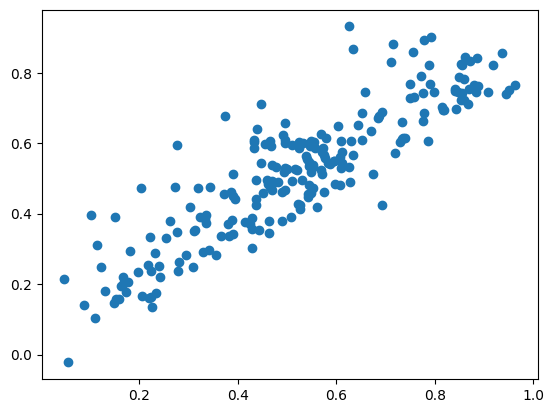

In [75]:
plt.scatter(y_test, y_test_pred)

In [76]:
## Check R2 score
r2_score(y_test, y_test_pred)

0.7792444496067217

In [ ]:
## Assignment-based Subjective Questions
## 1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? (3 marks)
## Answer: Insight 2 : The demand for bikes is quite less for Spring compared to other seasons
##         Insight 3 : There is no demand for bikes in heavy rains. Bikes are preferred - of course - in clear or cloudy whether.
## 2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)
## Answer: Did not have to use dummies.
## 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? (1 mark)
## Answer: Insight 1- From pairplots, there seems to be linear relation between temparature (temp and atemp) and count of bikes
## 4. How did you validate the assumptions of Linear Regression after building the model on the training set? (3 marks)
## Answer: Checked the normality of error distribution and R2 score.
## 5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes? (2 marks)
## Answer: feels like temperature, year and season